# Clasificador de riesgo de cáncer de pulmón basado en los síntomas del paciente

# Lung Cancer Prediction

Obtuvimos el dataset de: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link



## Columnas:
Age: The age of the patient. (Numeric)

Gender: The gender of the patient. (Categorical)

Air Pollution: The level of air pollution exposure of the patient. (Categorical)

Alcohol use: The level of alcohol use of the patient. (Categorical)

Dust Allergy: The level of dust allergy of the patient. (Categorical)

OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)

Genetic Risk: The level of genetic risk of the patient. (Categorical)

chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)

Balanced Diet: The level of balanced diet of the patient. (Categorical)

Obesity: The level of obesity of the patient. (Categorical)

Smoking: The level of smoking of the patient. (Categorical)

Passive Smoker: The level of passive smoker of the patient. (Categorical)

Chest Pain: The level of chest pain of the patient. (Categorical)

Coughing of Blood: The level of coughing of blood of the patient. (Categorical)

Fatigue: The level of fatigue of the patient. (Categorical)

Weight Loss: The level of weight loss of the patient. (Categorical)

Shortness of Breath: The level of shortness of breath of the patient. (Categorical)

Wheezing: The level of wheezing of the patient. (Categorical)

Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)

Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

In [79]:
#from google.colab import drive
#drive.mount('/gdrive')
import os
os.chdir('/content')


In [80]:
import pandas as pd
#filename = '/gdrive/MyDrive/cancer/data.csv'
filename = 'data (1).csv'
df = pd.read_csv(filename)
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [81]:
df.isnull().sum() #buscar si hay algun elemento vacio

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [82]:
# Borrando campos innecesarios
clean_df = df.drop([ 'index', 'Patient Id', 'Gender', 'Smoking', 'Balanced Diet','Age', 'Swallowing Difficulty',\
                    'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',\
                     'Obesity', 'Passive Smoker', 'chronic Lung Disease', 'Chest Pain', 'Coughing of Blood', 'Shortness of Breath'], axis = 1)

levels = {'Low':0, 'Medium':1, 'High':2}
clean_df['Level'].replace(levels, inplace=True)

In [83]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


<ipython-input-84-f7c1e6218505>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

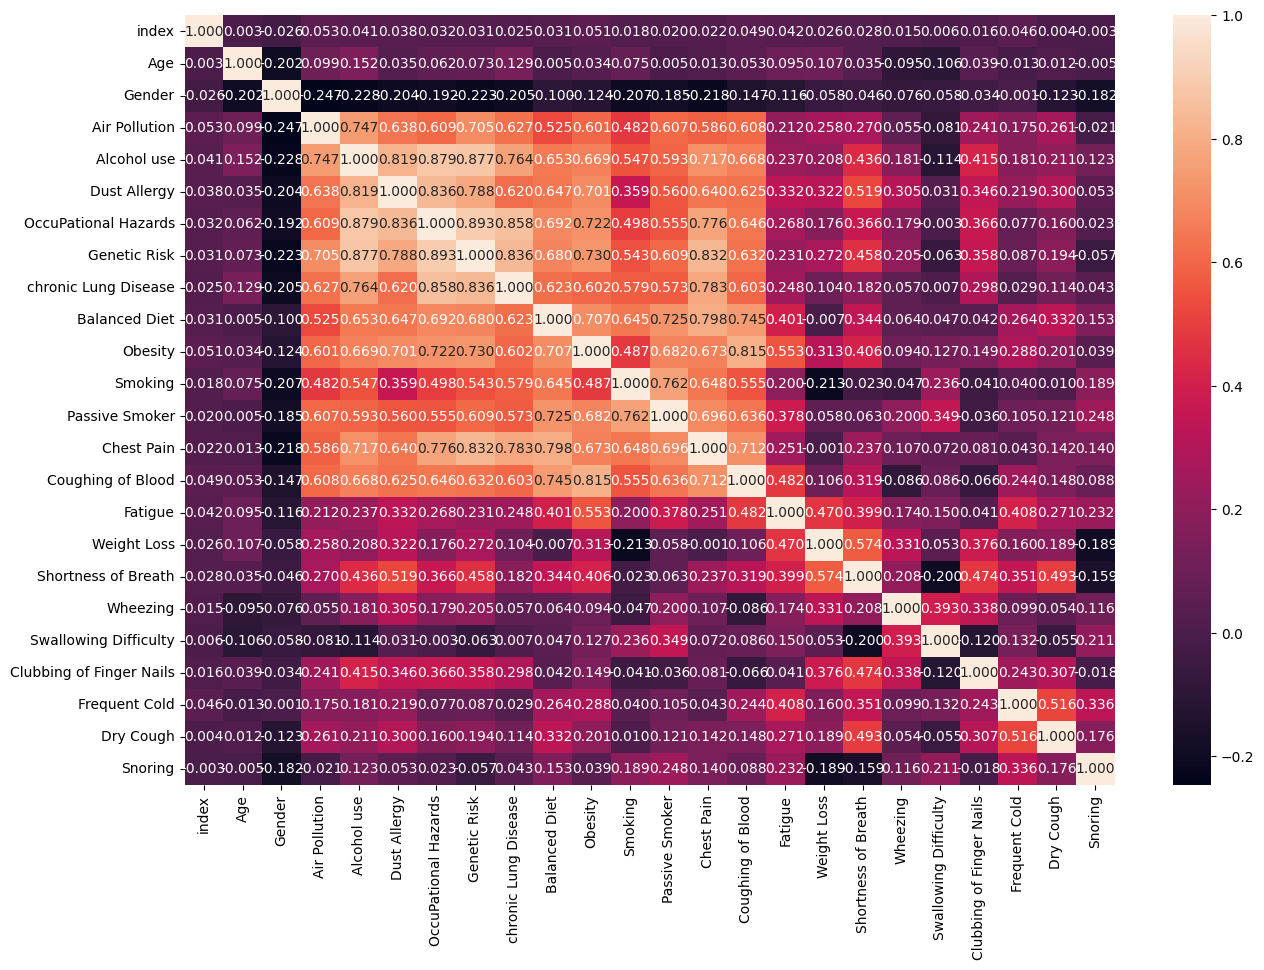

In [84]:
#@title **MATRIX DE CORRELACION**
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".3f")

<Axes: >

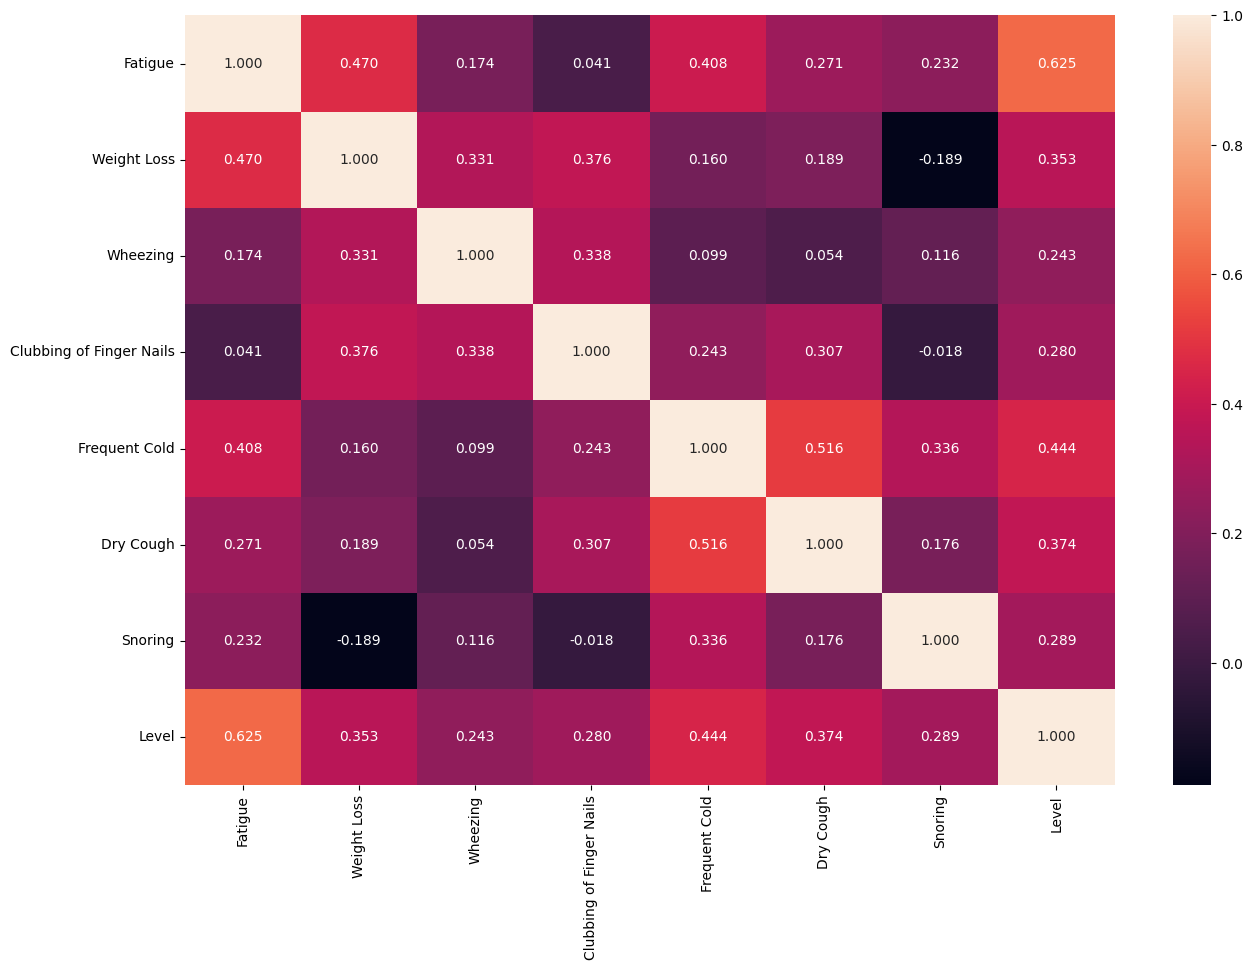

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,10))
corr = clean_df.corr()
sns.heatmap(corr, annot=True, fmt=".3f")

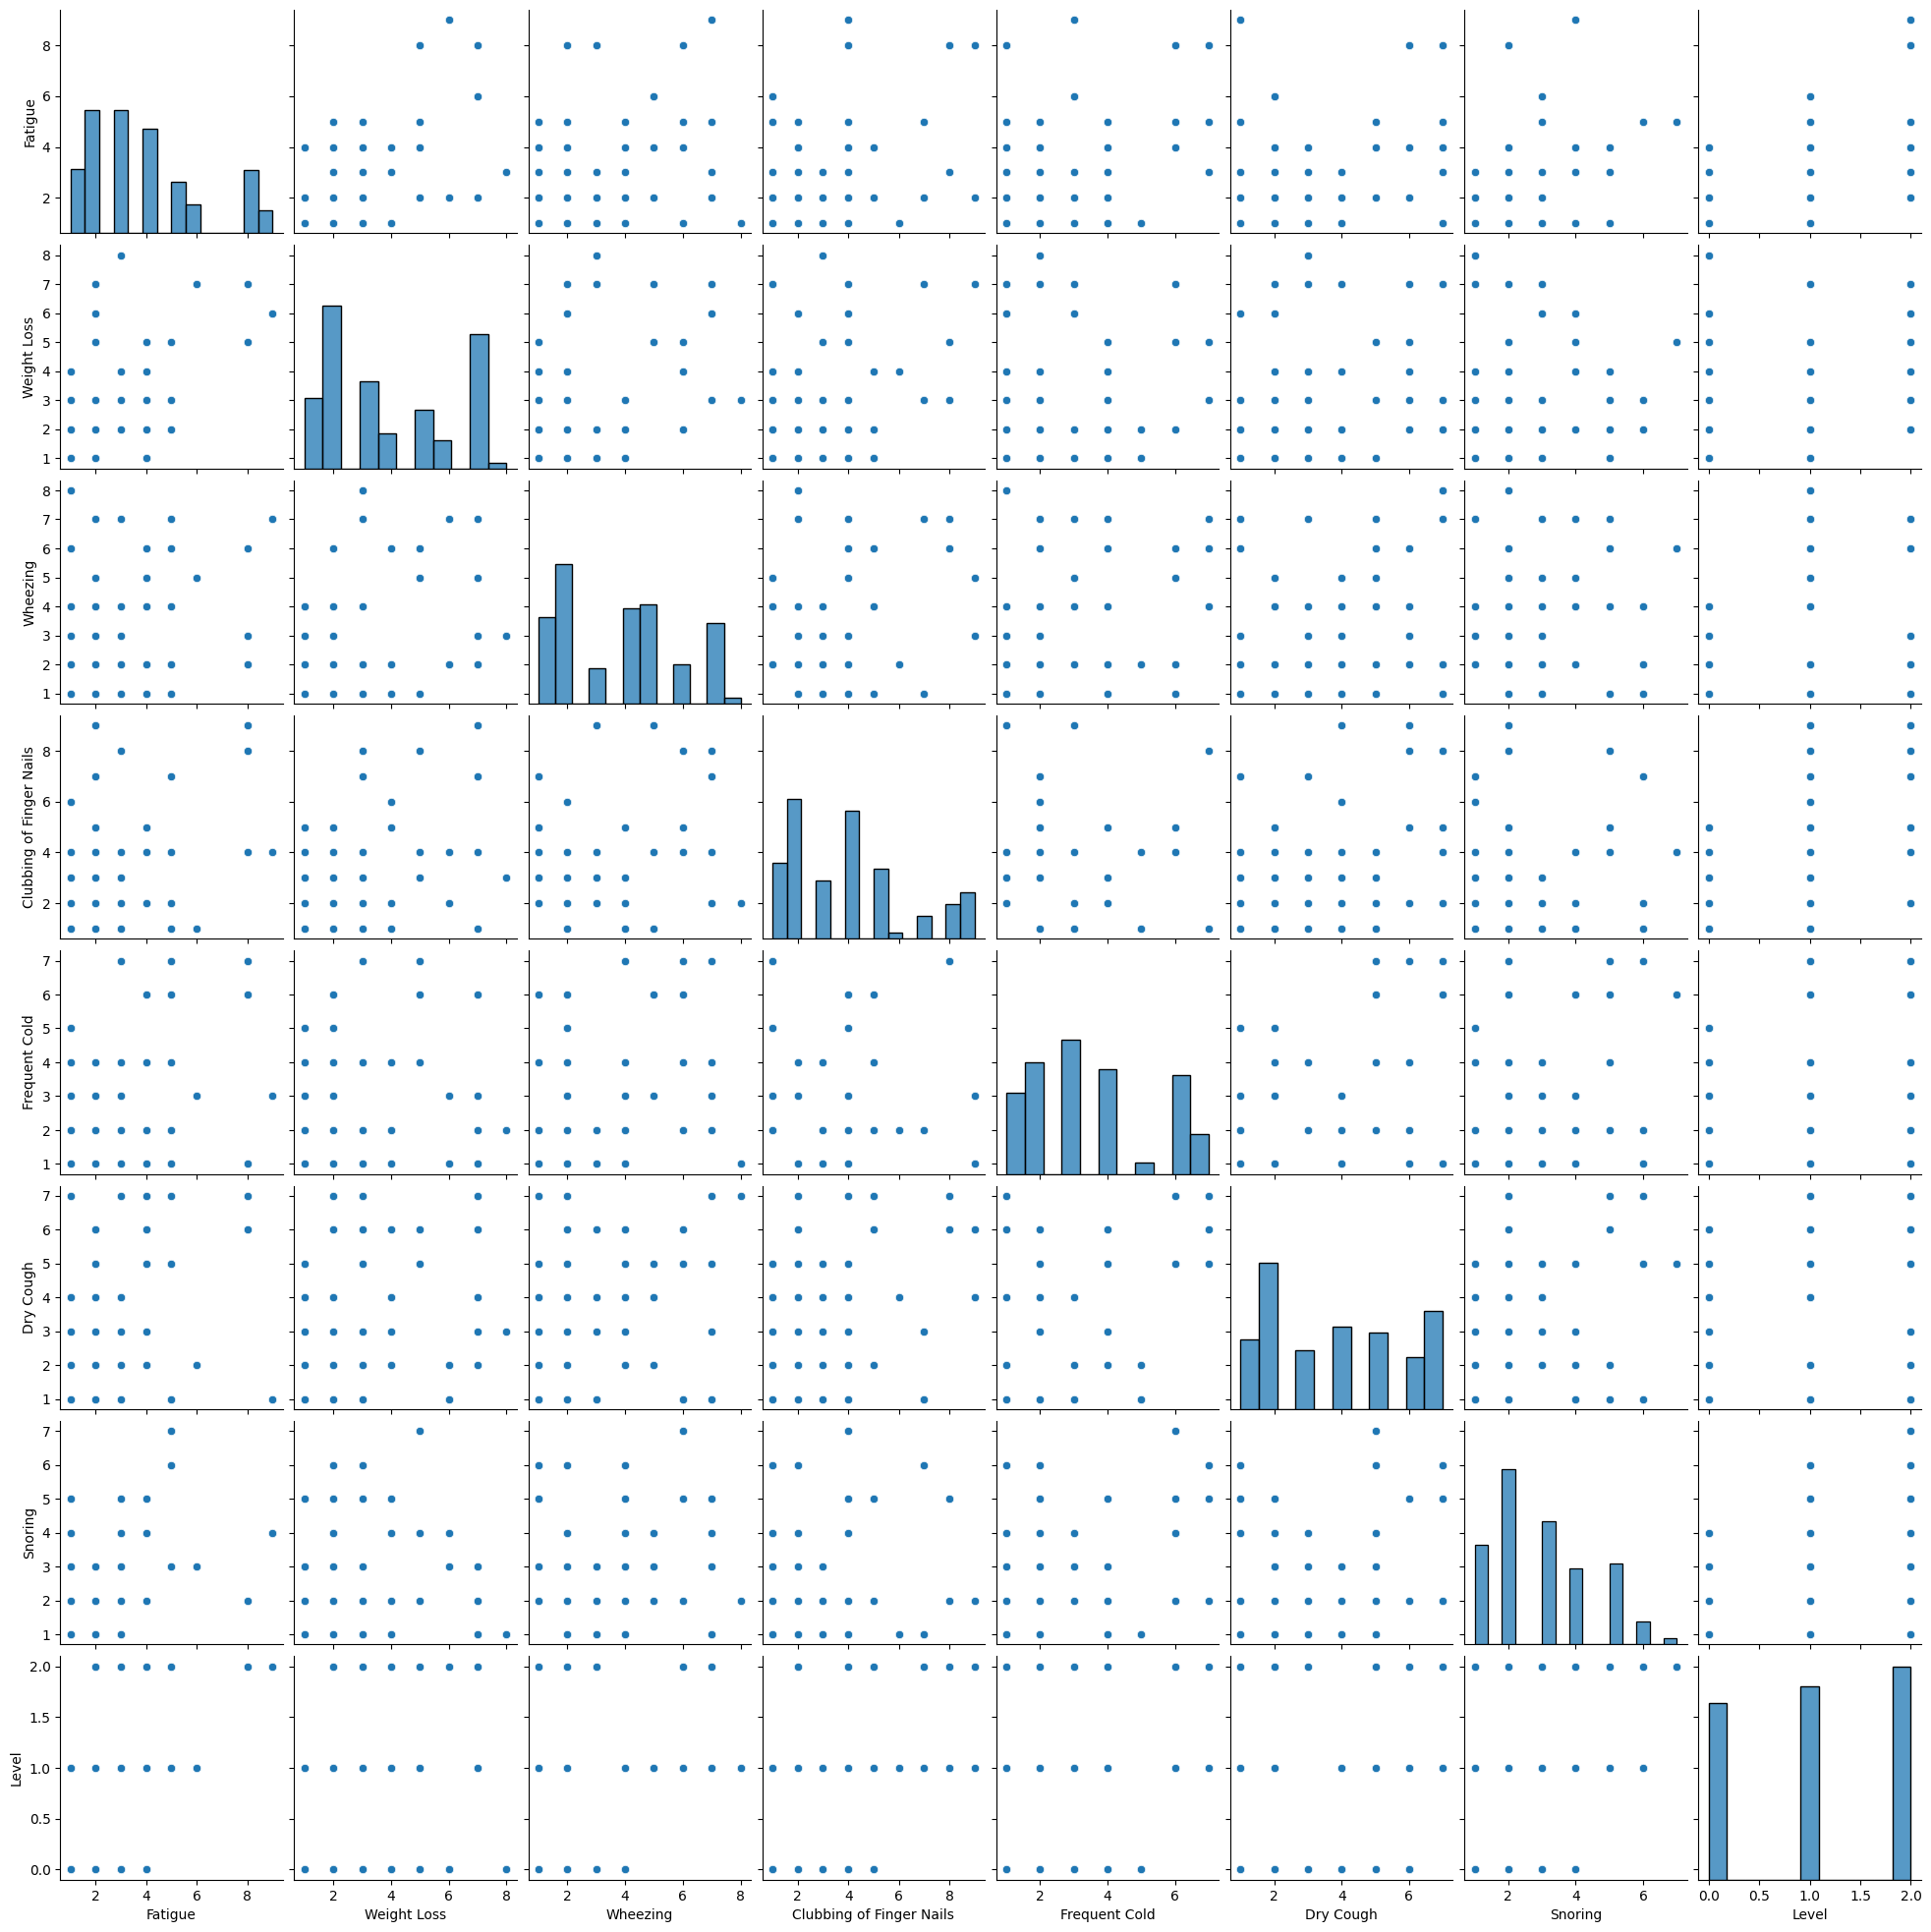

In [86]:
sns.pairplot(clean_df, diag_kind="hist");

#CONSTRUCCIÓN DEL MODELO
---

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


X = clean_df.values[:,:-1]
y = clean_df.values[:,-1] # colmna 26 levels: low, medium, high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)

In [88]:
print(set(y))

{0, 1, 2}


# Metodos de clasificación


In [89]:
#@title Metodo Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier(max_depth=3)
est.fit(X_train,y_train)
print(f'El accuracy del método descision Tree es: {accuracy_score(est.predict(X_test), y_test):.3f}')

El accuracy del método descision Tree es: 0.894


* Cross Validation

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import numpy as np

est = DecisionTreeClassifier(max_depth=6)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("Coss-validation accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


Coss-validation accuracy 0.997 (+/- 0.00458)


In [91]:
#@title Metodo Random Forest Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
est= RandomForestClassifier(random_state = 42, max_depth=3)
est.fit(X_train, y_train)
accuracy=accuracy_score(y_test,est.predict(X_test))
print(f'El accuracy score del metodo Random Forest es: {accuracy:.3f}')


El accuracy score del metodo Random Forest es: 0.912


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import numpy as np

est = RandomForestClassifier(random_state=42,max_depth=3)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("Coss-validation accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Coss-validation accuracy 0.950 (+/- 0.01949)


In [93]:
#@title Metodo SVC Support Vector Machine
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
est_SVC = SVC(random_state = 42)
est_SVC.fit(X_train, y_train)
accuracy_SVC=accuracy_score(y_test,est_SVC.predict(X_test))
print(f'El accuracy score del metodo SVC es: {accuracy_SVC:.3f}')

El accuracy score del metodo SVC es: 0.988


* Cross Validation

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import numpy as np

est = SVC(random_state=42)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("Coss-validation accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Coss-validation accuracy 0.988 (+/- 0.01600)


# Comparativa de los métodos de clasificación

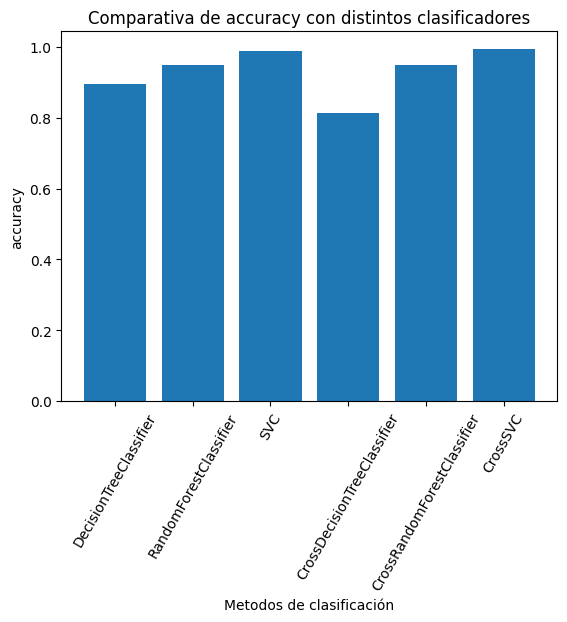

DecisionTreeClassifier 0.894
RandomForestClassifier 0.95
SVC 0.988
CrossDecisionTreeClassifier 0.8140000000000001
CrossRandomForestClassifier 0.9480000000000001
CrossSVC 0.9940000000000001


In [95]:

est = DecisionTreeClassifier(max_depth=5)
est.fit(X_train,y_train)

x = ["DecisionTreeClassifier", "RandomForestClassifier", "SVC","CrossDecisionTreeClassifier", "CrossRandomForestClassifier", "CrossSVC"]
classifiers = [DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=3), SVC()]
fit = [classi.fit(X_train,y_train) for classi in classifiers]
cross = [np.mean(cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))) for est in classifiers]
pred = [accuracy_score(est.predict(X_test), y_test) for est in fit]
y1 = pred + cross
plt.bar(x, y1)
plt.xlabel('Metodos de clasificación')
plt.ylabel('accuracy')
plt.title('Comparativa de accuracy con distintos clasificadores')
plt.xticks(x)
plt.tick_params(axis='x', rotation=60)


plt.show()

# Combinar los dos vectores utilizando zip
combined = zip(x, y1)

# Iterar sobre los elementos combinados e imprimir el primero de cada uno
for x_element, y1_element in combined:
    print(x_element, y1_element)

# Tuning de parámetros
## Tuning de parámetros Decision Treee Classifier

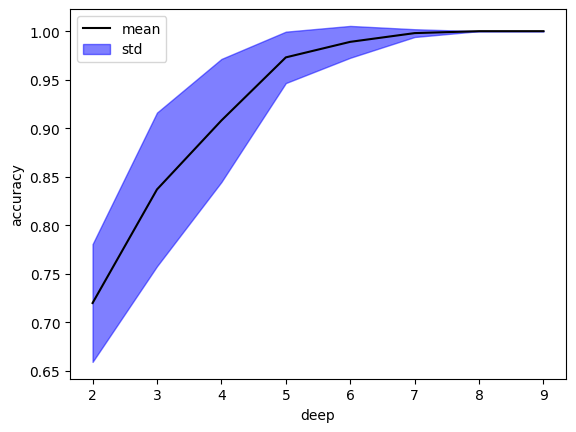

In [96]:
#@title **code** Tuneando el Max Deep
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error
    means, stds = [], []
    max_deep_range = range(2,10)
    for deep in max_deep_range:
        s = cross_val_score(DecisionTreeClassifier(max_depth=deep), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_deep_range, means, label="mean", color="black")
    plt.fill_between(max_deep_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("deep")
    plt.ylabel("accuracy")
    plt.legend()
show_curve()

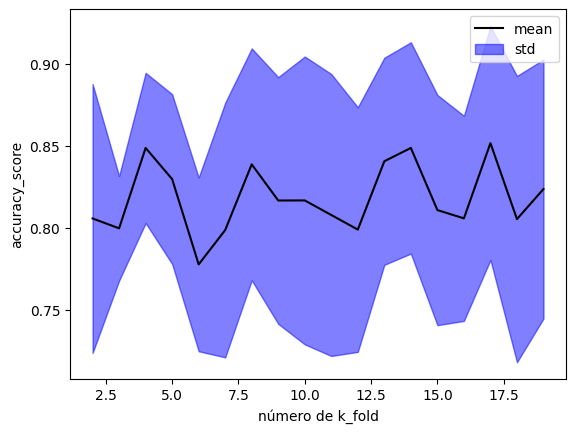

In [97]:
#@title **code** Tuneando el kfold
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    means, stds = [], []
    kfold_range = range(2,20)
    for kfold in kfold_range:
        s = cross_val_score(DecisionTreeClassifier(max_depth=3), X, y, cv=KFold(kfold, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(kfold_range, means, label="mean", color="black")
    plt.fill_between(kfold_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("número de k_fold")
    plt.ylabel("accuracy_score")
    plt.legend()
show_curve()

## Random Forest

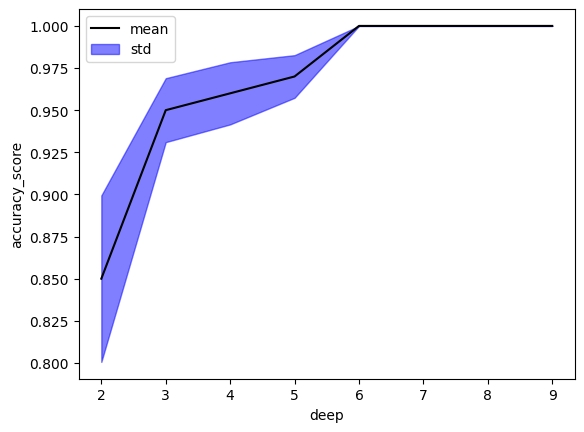

In [98]:
#@title **code** Tuneando el Max Deep
def show_curve():
  from sklearn.metrics import make_scorer
  from sklearn.metrics import accuracy_score
  means, stds = [], []
  max_deep_range = range(2,10)
  for deep in max_deep_range:
    s = cross_val_score(RandomForestClassifier(max_depth=deep,random_state = 42), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(max_deep_range, means, label="mean", color="black")
  plt.fill_between(max_deep_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("deep")
  plt.ylabel("accuracy_score")
  plt.legend()
show_curve()

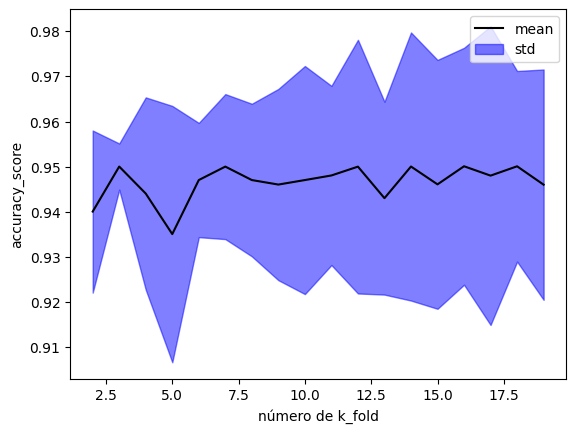

In [99]:
#@title **code** Tuneando el kfold
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error
    means, stds = [], []
    kfold_range = range(2,20)
    for kfold in kfold_range:
        s = cross_val_score(RandomForestClassifier(max_depth=3,random_state = 42), X, y, cv=KFold(kfold, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(kfold_range, means, label="mean", color="black")
    plt.fill_between(kfold_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("número de k_fold")
    plt.ylabel("accuracy_score")
    plt.legend()
show_curve()

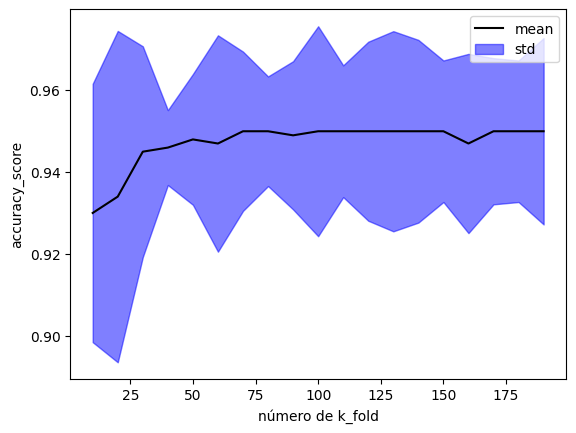

In [100]:
#@title **code** Tuneando el n_estimators
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    means, stds = [], []
    n_estimators_range = range(10,200,10)
    for estimators in n_estimators_range:
        s = cross_val_score(
            RandomForestClassifier(max_depth=3,random_state = 42, n_estimators=estimators),
            X, y,
            cv=KFold(10, shuffle=True),
            scoring=make_scorer(accuracy_score)
            )
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(n_estimators_range, means, label="mean", color="black")
    plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("número de k_fold")
    plt.ylabel("accuracy_score")
    plt.legend()
show_curve()

## SVC

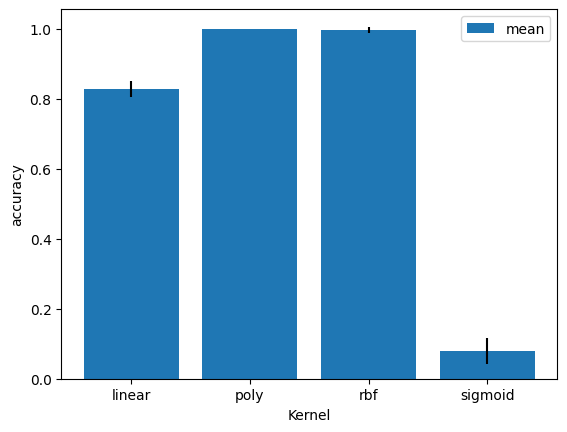

In [101]:
#@title **code** Tuneando el kernel
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    means, stds = [], []
    kernels = ['linear','poly', 'rbf', 'sigmoid']
    for kernel in kernels:
        est = SVC(random_state=42, kernel=kernel)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        # s = cross_val_score(SVC(random_state = 42, kernel=kernel),X, y,cv=KFold(10, shuffle=True),scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.bar(kernels, means, yerr=stds, label="mean")
    # plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Kernel")
    plt.ylabel("accuracy")
    plt.legend()
show_curve()

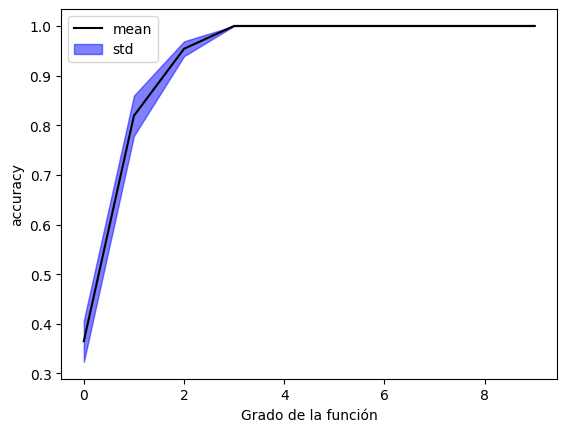

In [102]:
 #@title **code** Tuneando el grado para poly
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    means, stds = [], []
    degrees = range(10)
    kernel = 'poly'
    for degree in degrees:
        est = SVC(random_state=42, kernel=kernel, degree=degree)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        # s = cross_val_score(SVC(random_state = 42, kernel=kernel),X, y,cv=KFold(10, shuffle=True),scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    #plt.bar(levels, means, yerr=stds, label="mean")
    plt.plot(degrees, means, label="mean", color="black")
    plt.fill_between(degrees, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Grado de la función")
    plt.ylabel("accuracy")
    plt.legend()
show_curve()

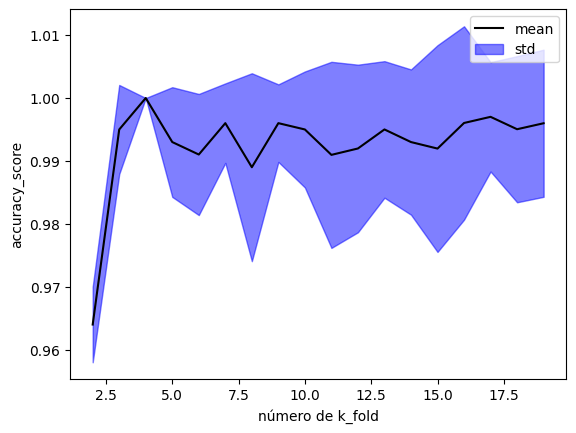

In [103]:
#@title **code** Tuneando el kfold
def show_curve():
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error
    means, stds = [], []
    kfold_range = range(2,20)
    for kfold in kfold_range:
        s = cross_val_score(SVC(random_state = 42), X, y, cv=KFold(kfold, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(kfold_range, means, label="mean", color="black")
    plt.fill_between(kfold_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("número de k_fold")
    plt.ylabel("accuracy_score")
    plt.legend()
show_curve()

# Deep Lerning

In [104]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(500, 7) (500,) (500, 7) (500,)


In [105]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= X_train[0].shape),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.gelu),
    tf.keras.layers.Dense(32, activation=tf.nn.gelu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 7)                 0         
                                                                 
 dense_28 (Dense)            (None, 1024)              8192      
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)               

In [106]:
model.compile(optimizer='adam',  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
16/16 [==============================] - 2s 22ms/step - loss: 0.9133 - accuracy: 0.5800
Epoch 2/5
16/16 [==============================] - 0s 21ms/step - loss: 0.5083 - accuracy: 0.8180
Epoch 3/5
16/16 [==============================] - 0s 21ms/step - loss: 0.3291 - accuracy: 0.8880
Epoch 4/5
16/16 [==============================] - 0s 19ms/step - loss: 0.1873 - accuracy: 0.9380
Epoch 5/5
16/16 [==============================] - 0s 15ms/step - loss: 0.1041 - accuracy: 0.9800


In [107]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9660
Test accuracy: 0.9660000205039978


In [108]:
from sklearn.metrics import classification_report
import numpy as np


y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

16/16 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       154
           1       0.97      0.93      0.95       162
           2       1.00      0.97      0.99       184

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



# Aprendizage no supervizado

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier

 **Paso 1: Estandarizar el dataframe y calcular matriz de covarianza**
---



**Estandarizando dataframe**

In [110]:
mean = np.mean(clean_df)
std = np.std(clean_df)

print(" mean:\n", mean)
print("\n std:\n", std)

standardized_df = (clean_df - mean) / std

 mean:
 Fatigue                     3.856
Weight Loss                 3.855
Wheezing                    3.777
Clubbing of Finger Nails    3.923
Frequent Cold               3.536
Dry Cough                   3.853
Snoring                     2.926
Level                       1.062
dtype: float64

 std:
 Fatigue                     2.243494
Weight Loss                 2.205442
Wheezing                    2.040900
Clubbing of Finger Nails    2.386854
Frequent Cold               1.831585
Dry Cough                   2.037987
Snoring                     1.473948
Level                       0.814958
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**Dataframe estandarizado**

In [111]:
standardized_df

,Fatigue,Weight Loss,Wheezing,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.381548,0.065746,-0.870694,-1.224625,-0.838618,-0.418550,0.728655,-1.303135
1,-1.273014,-0.387677,2.069186,-0.805663,-1.384593,1.544171,-0.628245,-0.076078
2,1.847119,1.426018,-0.870694,0.032260,1.345283,1.544171,-0.628245,1.150980
3,0.064186,-0.841101,-1.360675,0.451222,1.345283,1.544171,1.407105,1.150980
4,-0.381548,-0.841101,-1.360675,-0.805663,0.253332,-0.909231,0.050205,1.150980
...,...,...,...,...,...,...,...,...
995,0.509919,-0.387677,1.579206,-0.805663,0.253332,0.562810,0.050205,1.150980
996,2.292852,0.972594,1.579206,0.032260,-0.292643,-1.399911,0.728655,1.150980
997,1.847119,1.426018,-0.870694,0.032260,1.345283,1.544171,-0.628245,1.150980
998,-0.381548,-0.841101,-1.360675,-0.805663,0.253332,-0.909231,0.050205,1.150980


**Hallando matriz de covarianza**

In [112]:
covariance_matrix = np.cov(standardized_df, ddof = 1, rowvar = False)
covariance_matrix

array([[ 1.001001  ,  0.46998677,  0.17465214,  0.04073474,  0.40832338,
         0.27143828,  0.23198031,  0.62573937],
       [ 0.46998677,  1.001001  ,  0.33151048,  0.37686042,  0.16050887,
         0.18878693, -0.18929579,  0.35309064],
       [ 0.17465214,  0.33151048,  1.001001  ,  0.33860955,  0.09895395,
         0.05444281,  0.11629881,  0.24303684],
       [ 0.04073474,  0.37686042,  0.33860955,  1.001001  ,  0.24277216,
         0.30757838, -0.01755486,  0.28034319],
       [ 0.40832338,  0.16050887,  0.09895395,  0.24277216,  1.001001  ,
         0.51643466,  0.3361797 ,  0.44446124],
       [ 0.27143828,  0.18878693,  0.05444281,  0.30757838,  0.51643466,
         1.001001  ,  0.17632205,  0.3743427 ],
       [ 0.23198031, -0.18929579,  0.11629881, -0.01755486,  0.3361797 ,
         0.17632205,  1.001001  ,  0.28965561],
       [ 0.62573937,  0.35309064,  0.24303684,  0.28034319,  0.44446124,
         0.3743427 ,  0.28965561,  1.001001  ]])

 **Paso 2: hacer "Eigendecomposition" en la matriz de covarianza, clasificar los componentes principales y calcular "Explained variance"**
---

**Eigendecomposition**

In [113]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("eigenvalues", eigenvalues)

print("eigenvectors", eigenvectors)

eigenvalues [2.93456501 1.43606188 1.02832907 0.95947582 0.25572    0.52374738
 0.41558007 0.45452879]
eigenvectors [[-0.42357071 -0.08408027 -0.56540731  0.10947874 -0.69030511  0.01494723
  -0.06833706  0.02080456]
 [-0.33760992  0.51037821 -0.26515625  0.19494145  0.45188392  0.05393917
  -0.53180996  0.16520677]
 [-0.2496095   0.3709895   0.04082154 -0.68964943 -0.04863957  0.51057373
   0.21669628 -0.11300681]
 [-0.29335082  0.39138631  0.56548514 -0.06725887 -0.34423664 -0.5453825
  -0.05098536  0.13388207]
 [-0.40718108 -0.31196852  0.22355536  0.15365074  0.1304021   0.27498946
   0.26267889  0.70828635]
 [-0.36394692 -0.17615636  0.43327796  0.37710123 -0.04061731  0.37487843
  -0.19026597 -0.57288019]
 [-0.20409761 -0.55309398  0.0391679  -0.55117307  0.12211372 -0.20451577
  -0.53884855  0.00302039]
 [-0.4672667  -0.08578914 -0.22209455 -0.01632485  0.40601585 -0.42515856
   0.51709993 -0.33422831]]


**Clasificando los componentes principales**

In [114]:
order_of_importance = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

**Calculando matriz de covarianza**

In [115]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

**Paso 3: Reducir el dataframe a través de los componentes principales y determinar "Explained Variance"**
---

**Reduciendo el dataframe**

para escoger el número de componentes principales adecuados primero es necesario escoger arbitrariamente dicho número para trasnformar el dataframe y en base a esa información hallar "explained variance", de este modo usaremos $k$ = 2

In [116]:
k = 2
reduced_df = np.matmul(standardized_df, sorted_eigenvectors[:,:k])

print(reduced_df)

            0         1
0    1.669988 -0.692551
1    0.555505  0.875433
2   -2.575315 -0.180855
3   -1.470723 -2.331575
4    0.701254 -1.262695
..        ...       ...
995 -1.098992 -0.274877
996 -1.761070  0.738244
997 -2.575315 -0.180855
998  0.701254 -1.262695
999 -2.575315 -0.180855

[1000 rows x 2 columns]


## Visualizamos el dataset en una vista 2d

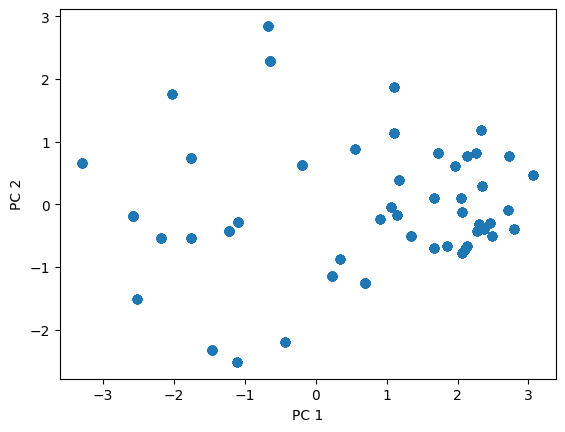

In [117]:
plt.scatter(reduced_df[0], reduced_df[1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

**Calculando "Explained Variance"**

In [118]:
total_explained_variance = sum(explained_variance[:k])

print(explained_variance)

print("total_explained_variance (k=2):", total_explained_variance)

[0.36645381 0.17932823 0.12841259 0.11981454 0.06540295 0.05675928
 0.05189556 0.03193304]
total_explained_variance (k=2): 0.5457820321932842


**Escogiendo valor de componentes principales adecuado**

Luego de calcular "Explained Variance" se realiza una iteración sobre los valores de $k$ para ver cuáles son los valores de la varianza explicados, posterior a ello se grafica "Explained Variance" acumulada donde se mide cuánta varianza explicada total (%) se gana a medida que se aumenta el número de componentes principales $k$ y en base a dicha información se puede escoger el número de componentes principales adecuado

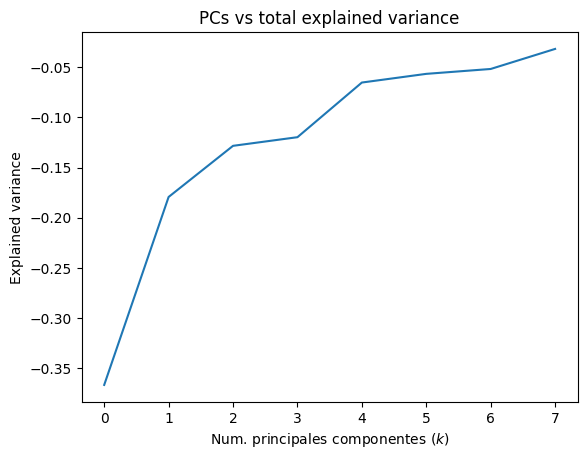

In [119]:
plt.plot(-1*explained_variance)
plt.title("PCs vs total explained variance")
plt.xlabel("Num. principales componentes ($k$)")
plt.ylabel("Explained variance")
plt.show()

Como podemos observar, 4 componentes explican el 95% de la variancia total. Así que es un buen valor para tomar como $k$. De este modo se realiza PCA de la siguiente manera:

## **Kmeans**

In [136]:
# from scipy.spatial.distance import cdist

# distortions = []
# wss = [] #Within-Cluster-Sum of Squared
# K = range(1,20)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(X)
#     kmeanModel.fit(X)
#     distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
#     wss.append(kmeanModel.inertia_)

# plt.figure(figsize=(15,5))
# plt.subplot(221)
# plt.plot(K, distortions, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.subplot(222)
# plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
# plt.title('The Elbow Method -inertia k')
# plt.subplot(223)
# kmeanModel = KMeans(n_clusters=6, n_init='auto').fit(X)
# kmeanModel.fit(X)
# plt.scatter(X[:,0], X[:,1], c=kmeanModel.labels_, cmap='rainbow');
# plt.scatter(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1], color='black')
# plt.title('Gráfica aplicando kmeans')
# plt.subplot(224)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow');
# plt.title('Gráfica basado en los y labels conocidos')

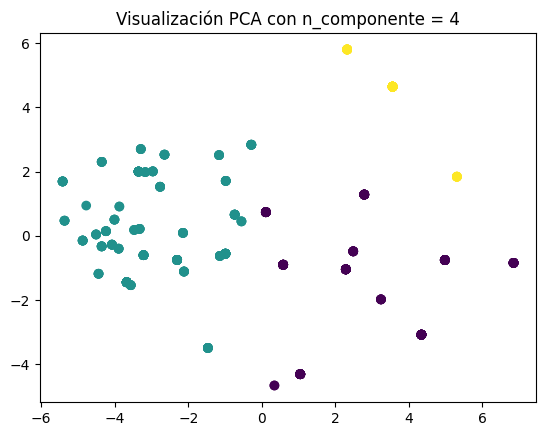

In [137]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Crear y ajustar el modelo PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)

kmeanModel = KMeans(n_clusters=3, n_init='auto').fit(X_train_pca)
#kmeanModel.fit(X)
# plt.scatter(X[:,0], X[:,1], c=kmeanModel.labels_, cmap='rainbow');
# plt.scatter(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1], color='black')


# Visualizar los datos transformados por PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeanModel.labels_)
plt.title('Visualización PCA con n_componente = 4')
plt.show()

# DBscan

<ipython-input-141-0741d8d94855>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_db[:,0], X_db[:,1], c="blue", cmap='rainbow');


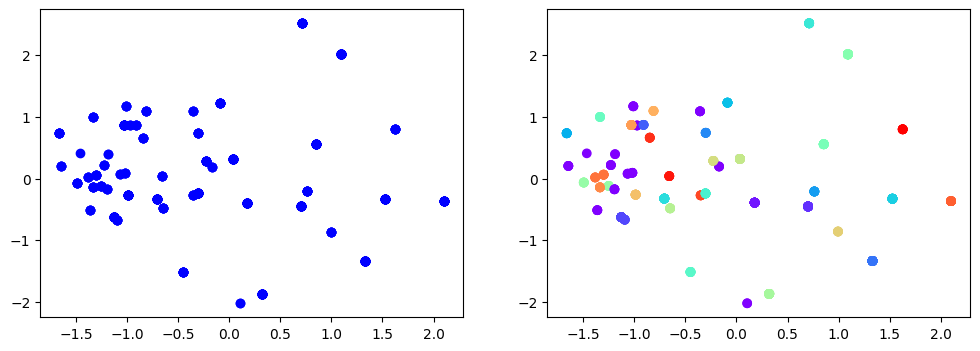

In [141]:
from sklearn.preprocessing import StandardScaler

X_db = StandardScaler().fit_transform(X_train_pca) #mean zero and variance one

DBS = DBSCAN(eps=.3)
DBS.fit(X_db)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_db[:,0], X_db[:,1], c="blue", cmap='rainbow');
plt.subplot(122)
plt.scatter(X_db[:,0],X_db[:,1], c=DBS.labels_, cmap='rainbow');

# Aglomerative clustering

Text(0.5, 1.0, 'Aplicando Aglomerative Clustering')

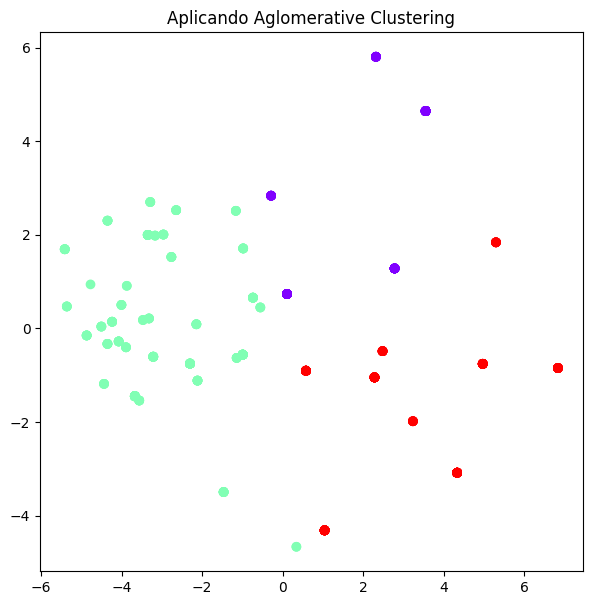

In [140]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy


clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(X_train_pca)

clusters = hierarchy.linkage(X, method="ward") # to obtain a visual representation
labels = clustering_model.labels_


# plt.figure(figsize=(15,5))
# plt.subplot(131)
# plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
# plt.title("Gráfica de 2 componentes")
# plt.subplot(132)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow');
# plt.title("Gráfica de componentes conocidos")
plt.figure(figsize=(7,7))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=labels, cmap='rainbow');
plt.title("Aplicando Aglomerative Clustering")
